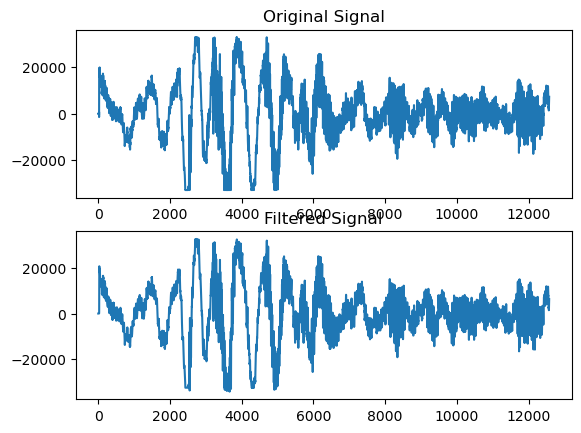

In [2]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to create a low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Function to apply the filter
def lfilter_data(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Read the audio file
fs, data = wavfile.read('audio.wav')

# Define filter parameters
cutoff = 1000.0  # The frequency where the filter will start blocking higher sounds
order = 6

# Filter the data
filtered_data = lfilter_data(data, cutoff, fs, order)

# Save the filtered audio
wavfile.write('filtered_audio.wav', fs, filtered_data.astype(np.int16))

# Plot the original and filtered signals
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(data)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(filtered_data)
plt.title('Filtered Signal')
plt.show()
